In [1]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
source_dir = '/Users/arbailey/natcap/idb/data/work/sargassum/shore_segments'
gpkg = 'sargassum_analysis_data_work.gpkg'
sarg_gpkg = os.path.join(source_dir, gpkg)
print(sarg_gpkg)

/Users/arbailey/natcap/idb/data/work/sargassum/shore_segments/sargassum_analysis_data_work.gpkg


In [3]:
# Import sargassum segment occurrence / abundance and calculate some addtional columns
sarg_segs = 'shore100m_sargassum_stats'
sarg_gdf = gpd.read_file(sarg_gpkg, layer=sarg_segs, ignore_geometry=True) 
sarg_gdf['image_date']= pd.to_datetime(sarg_gdf['image_date'])
sarg_gdf['valid_pxl_toa1'] = sarg_gdf['cnt_pxl_toa1'] - sarg_gdf['nd_pxl_toa1']
sarg_gdf['pr_prop_valid_toa1'] = sarg_gdf['pr_pxl_toa1'] / sarg_gdf['valid_pxl_toa1']
sarg_gdf['pr_toa1'] = np.where(sarg_gdf['pr_pxl_toa1']!= 0, 1, 0)
sarg_gdf

/Users/arbailey/opt/miniconda3/envs/geoenv/lib/python3.8/site-packages/geopandas/io/file.py:200: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  [record["properties"] for record in f_filt], columns=columns


,seg_id,image_date,pr_pxl_toa1,nd_pxl_toa1,cnt_pxl_toa1,nd_prop_toa1,pr_pxl_toa3,nd_pxl_toa3,cnt_pxl_toa3,nd_prop_toa3,valid_pxl_toa1,pr_prop_valid_toa1,pr_toa1
0,1,2015-11-19,0,3585,5011,0.715426,0,3585,5011,0.715426,1426,0.000000,0
1,2,2015-11-19,0,13,8217,0.001582,0,13,8217,0.001582,8204,0.000000,0
2,4,2015-11-19,0,133,12240,0.010866,0,133,12240,0.010866,12107,0.000000,0
3,5,2015-11-19,29,182,4811,0.037830,0,182,4811,0.037830,4629,0.006265,1
4,7,2015-11-19,0,0,1029,0.000000,0,0,1029,0.000000,1029,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16794,191,2019-12-28,968,1718,20585,0.083459,738,1718,20585,0.083459,18867,0.051307,1
16795,194,2019-12-28,2080,0,17603,0.000000,1325,0,17603,0.000000,17603,0.118162,1
16796,195,2019-12-28,38,751,23609,0.031810,1,751,23609,0.031810,22858,0.001662,1
16797,196,2019-12-28,224,6,1926,0.003115,67,6,1926,0.003115,1920,0.116667,1


In [26]:
segs = 'shoreQR_segments'
segs_gdf = gpd.read_file(sarg_gpkg, layer=segs) 
segs_gdf

/Users/arbailey/opt/miniconda3/envs/geoenv/lib/python3.8/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,type_geomorph,length_km,seg_id,shore_desc,desc_abbrev,geometry
0,cliff or rocky,2.188708,1,Isla Mujeres,imu,"MULTILINESTRING ((530027.596 2344472.852, 5300..."
1,sand,3.738697,2,Isla Contoy,ico,"MULTILINESTRING ((521010.617 2378995.910, 5210..."
2,sand,5.622333,4,QR mainland,qrm,"MULTILINESTRING ((433485.994 2090201.431, 4334..."
3,sand,2.136723,5,QR mainland,qrm,"MULTILINESTRING ((410987.143 2013924.228, 4109..."
4,artificial,0.322818,7,QR mainland,qrm,"MULTILINESTRING ((520038.267 2342642.380, 5200..."
...,...,...,...,...,...,...
152,sand,9.474202,191,Holbox,hol,"MULTILINESTRING ((459230.929 2378361.531, 4592..."
153,sand,8.177061,194,Holbox,hol,"MULTILINESTRING ((488231.217 2388467.313, 4882..."
154,sand,11.078166,195,QR mainland,qrm,"MULTILINESTRING ((516830.778 2314283.226, 5168..."
155,sand,0.784313,196,Isla de la Pasion,ipa,"MULTILINESTRING ((513991.173 2272135.231, 5139..."


In [4]:
sarg_gdf.describe()

,seg_id,pr_pxl_toa1,nd_pxl_toa1,cnt_pxl_toa1,nd_prop_toa1,pr_pxl_toa3,nd_pxl_toa3,cnt_pxl_toa3,nd_prop_toa3,valid_pxl_toa1,pr_prop_valid_toa1,pr_toa1
count,16799.000000,16799.000000,16799.000000,16799.000000,16799.000000,16799.000000,16799.000000,16799.000000,16799.000000,16799.000000,16509.000000,16799.000000
mean,101.929936,123.668552,1301.841717,8929.566879,0.147137,60.812370,1301.841717,8929.566879,0.147137,7627.725162,0.013513,0.489791
std,56.431458,338.279735,3470.380449,11703.734511,0.249296,216.489595,3470.380449,11703.734511,0.249296,10477.025267,0.025962,0.499911
min,1.000000,0.000000,0.000000,695.000000,0.000000,0.000000,0.000000,695.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,0.000000,19.000000,1828.000000,0.005662,0.000000,19.000000,1828.000000,0.005662,1472.000000,0.000000,0.000000
50%,106.000000,0.000000,131.000000,4215.000000,0.031691,0.000000,131.000000,4215.000000,0.031691,3287.000000,0.000000,0.000000
75%,149.000000,87.000000,945.000000,11065.000000,0.145861,29.000000,945.000000,11065.000000,0.145861,8202.500000,0.017328,1.000000
max,197.000000,4753.000000,54997.000000,54997.000000,1.000000,3690.000000,54997.000000,54997.000000,1.000000,54997.000000,0.712000,1.000000


## Data Distributions for All Segments -- No Data and Sargassum Pixel Counts

<AxesSubplot:ylabel='Frequency'>

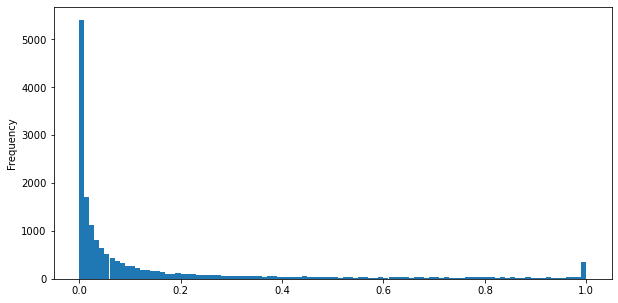

In [5]:
## NO Data
(sarg_gdf['nd_prop_toa1']
 .plot
 .hist(bins=100, figsize=(10, 5)))

<AxesSubplot:ylabel='Frequency'>

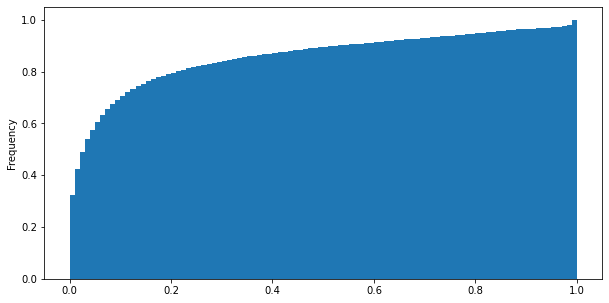

In [6]:
(sarg_gdf['nd_prop_toa1']
 .plot
 .hist(bins=100, cumulative=True, density=1, figsize=(10, 5)))
# ser.hist(cumulative=True, density=1, bins=100)

<AxesSubplot:ylabel='Density'>

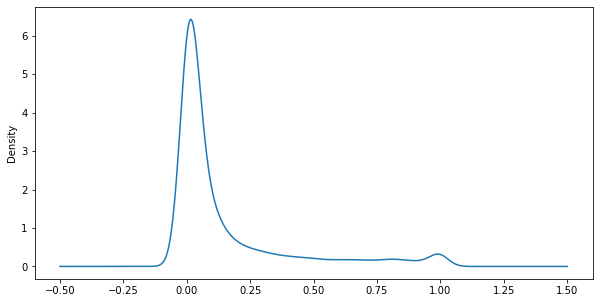

In [7]:
(sarg_gdf['nd_prop_toa1']
 .plot
 .kde(figsize=(10, 5)))

<AxesSubplot:ylabel='Frequency'>

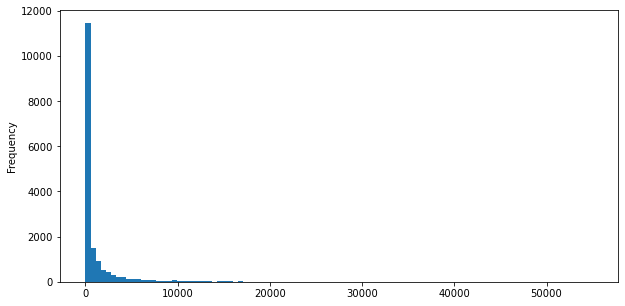

In [8]:
## Sargassum abundance
(sarg_gdf['nd_pxl_toa1']
 .plot
 .hist(bins=100, figsize=(10, 5)))

<AxesSubplot:ylabel='Density'>

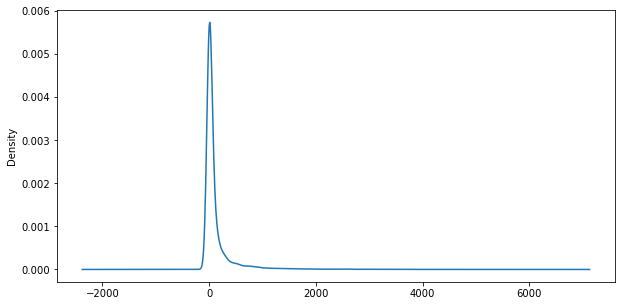

In [9]:
(sarg_gdf['pr_pxl_toa1']
 .plot
 .kde(figsize=(10, 5)))

<AxesSubplot:ylabel='Frequency'>

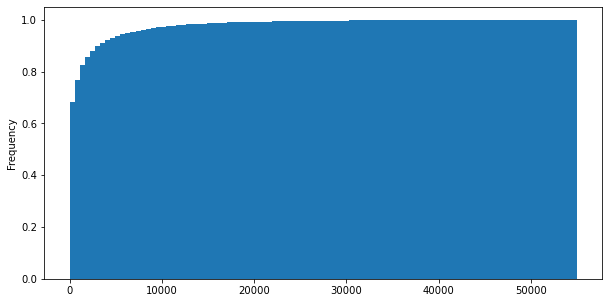

In [10]:
(sarg_gdf['nd_pxl_toa1']
 .plot
 .hist(bins=100, cumulative=True, density=1, figsize=(10, 5)))
# ser.hist(cumulative=True, density=1, bins=100)

In [11]:
# sum, Mean and standard deviation of Sargassum pixel count by Segment
seg_summarize = sarg_gdf.groupby(['seg_id']).agg(
    {'nd_pxl_toa1': [np.sum, np.mean, np.std],
     'pr_pxl_toa1': [np.sum, np.mean, np.std],
     'cnt_pxl_toa1': [np.max],
     'pr_toa1': [np.sum]}
    ).reset_index()
seg_summarize

seg_summarize = sarg_gdf.groupby(['seg_id']).agg(
    sum_nd_pxl=('nd_pxl_toa1', np.sum),
    avg_nd_pxl=('nd_pxl_toa1', np.mean),
    std_nd_pxl=('nd_pxl_toa1', np.std),
    sum_pr_pxl=('pr_pxl_toa1', np.sum),
    avg_pr_pxl=('pr_pxl_toa1', np.mean),
    std_pr_pxl=('pr_pxl_toa1', np.std),
    cnt_all_pxl = ('cnt_pxl_toa1', np.max),
    cnt_sarg_pr = ('pr_toa1', np.sum),
    ).reset_index()
seg_summarize

# # Mean and standard deviation of radiance by Segment and Date - removed radiances <= 0
# # Assign custom field names to grouped columns
# seg_month_slc_mean = slc_norm_gdf[(slc_norm_gdf['avg_rad'] > 0)].groupby(
#     ['seg_id','ntldate']).agg(
#     obs_count=('avg_rad', np.size),
#     ntl_mean=('avg_rad', np.mean),
#     ntl_std=('avg_rad', np.std),
#     ).reset_index()
# seg_month_slc_mean


,seg_id,sum_nd_pxl,avg_nd_pxl,std_nd_pxl,sum_pr_pxl,avg_pr_pxl,std_pr_pxl,cnt_all_pxl,cnt_sarg_pr
0,1,50644,473.308411,974.114474,1716,16.037383,57.413582,5011,17
1,2,96671,903.467290,1852.025690,13675,127.803738,163.111285,8217,76
2,4,170171,1590.383178,2672.040149,30156,281.831776,280.890480,12240,95
3,5,53527,500.252336,914.620089,10835,101.261682,154.547931,4811,67
4,7,21713,202.925234,257.914887,220,2.056075,8.092428,1029,10
...,...,...,...,...,...,...,...,...,...
152,191,369644,3454.616822,5386.582169,23287,217.635514,358.498477,20585,82
153,194,264461,2471.598131,4622.621242,41951,392.065421,423.092440,17603,92
154,195,329107,3075.766355,3551.437242,32563,304.327103,343.715870,23609,92
155,196,39864,372.560748,455.670648,2037,19.037383,41.906213,1926,32


In [12]:
# sum, Mean and standard deviation of Sargassum pixel count by Date
date_summarize = sarg_gdf.groupby(['image_date']).agg(
    {'nd_pxl_toa1': [np.sum, np.mean, np.std],
     'pr_pxl_toa1': [np.sum, np.mean, np.std]}
    ).reset_index()
date_summarize

image_date nd_pxl_toa1                           pr_pxl_toa1              \
                       sum         mean          std         sum        mean   
0   2015-11-19      334175  2128.503185  5330.264648        2534   16.140127   
1   2015-11-29      284541  1812.363057  4497.619251       12600   80.254777   
2   2016-04-27      257978  1643.171975  3550.849619       21184  134.929936   
3   2016-05-07      123749   788.210191  1532.916087        9686   61.694268   
4   2016-06-16      589213  3752.949045  7122.526881        1386    8.828025   
..         ...         ...          ...          ...         ...         ...   
102 2019-11-18       75611   481.598726  2835.227549        9729   61.968153   
103 2019-11-23      130073   828.490446  2381.831464       14047   89.471338   
104 2019-12-03       37161   236.694268  1144.166938       12528   79.796178   
105 2019-12-23       90682   577.592357  1954.788683       18098  115.273885   
106 2019-12-28       65504   417.222930  2112.275270       15910  101.337580   

                 
            std  
0     58.496489  
1    223.308568  
2    341.311293  
3    196.388014  
4     26.768518  
..          ...  
102  176.065672  
103  158.563688  
104  163.328823  
105  286.079795  
106  274.397465  

[107 rows x 7 columns]

In [13]:
date_summarize.columns

MultiIndex([( 'image_date',     ''),
            ('nd_pxl_toa1',  'sum'),
            ('nd_pxl_toa1', 'mean'),
            ('nd_pxl_toa1',  'std'),
            ('pr_pxl_toa1',  'sum'),
            ('pr_pxl_toa1', 'mean'),
            ('pr_pxl_toa1',  'std')],
           )

<AxesSubplot:xlabel='image_date'>

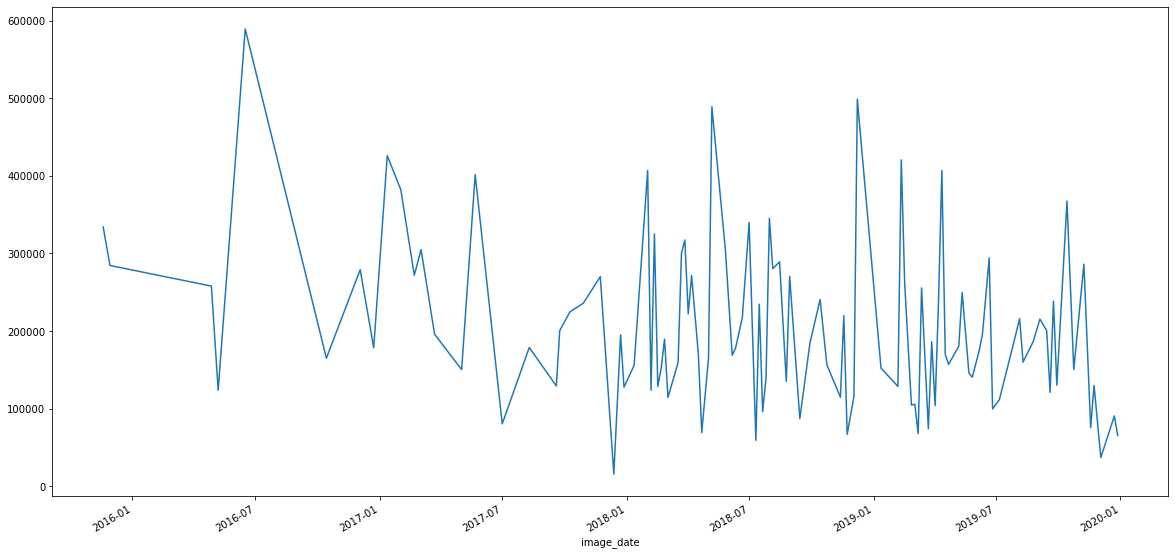

In [14]:
date_summarize.set_index('image_date')[('nd_pxl_toa1','sum')].plot(figsize=(20, 10))

<AxesSubplot:xlabel='image_date'>

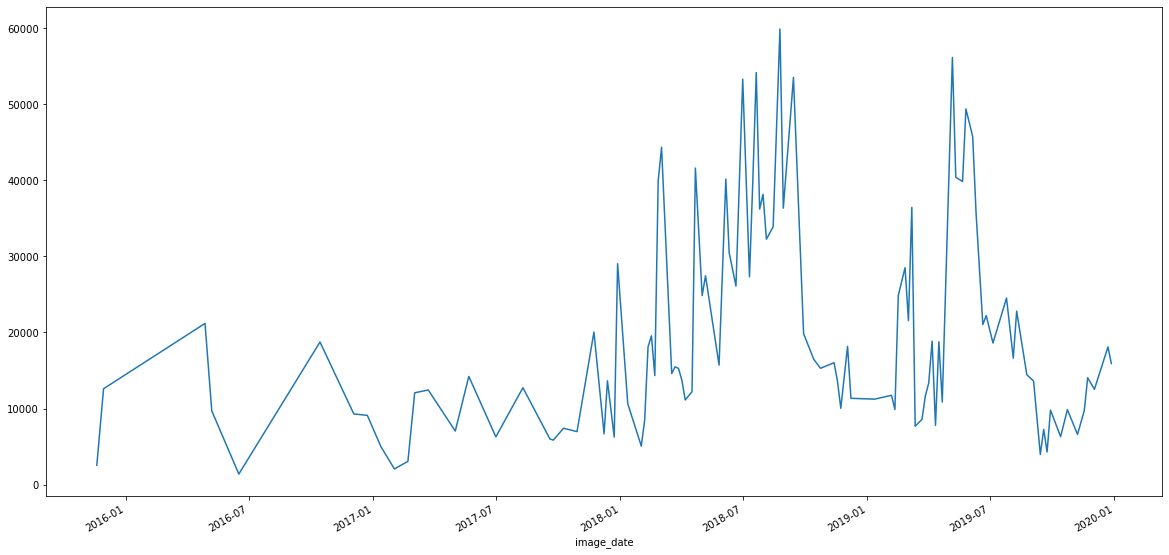

In [15]:
date_summarize.set_index('image_date')[('pr_pxl_toa1','sum')].plot(figsize=(20, 10))

<AxesSubplot:xlabel='nd_pxl_toa1', ylabel='pr_pxl_toa1'>

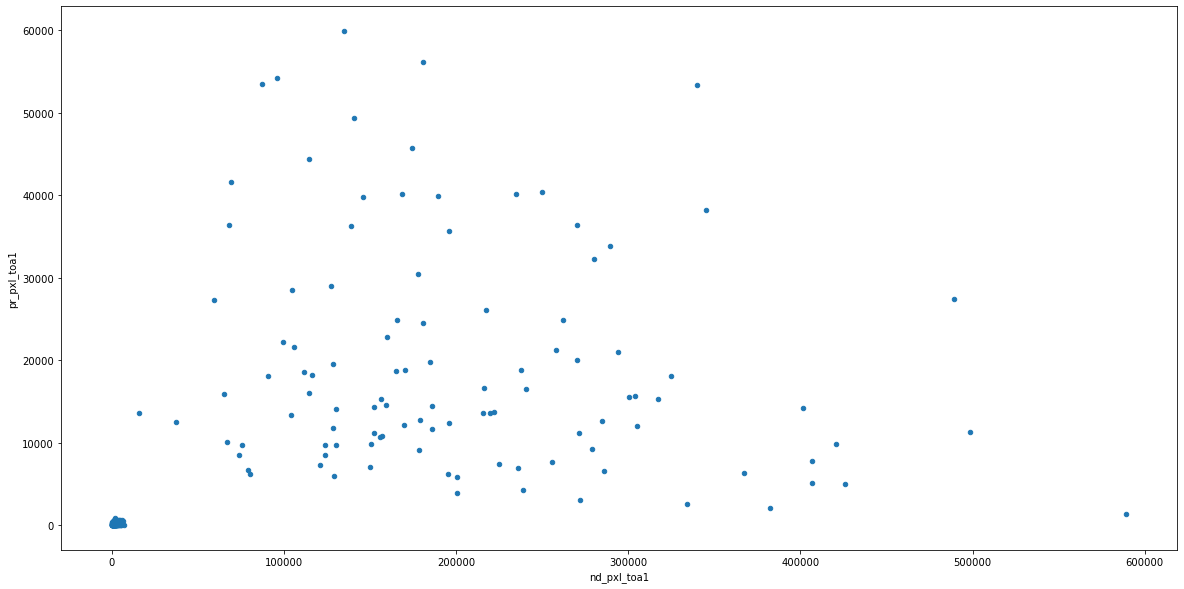

In [16]:
(date_summarize
 .plot
 .scatter(x='nd_pxl_toa1', y='pr_pxl_toa1', figsize=(20, 10)))

<AxesSubplot:xlabel='seg_id'>

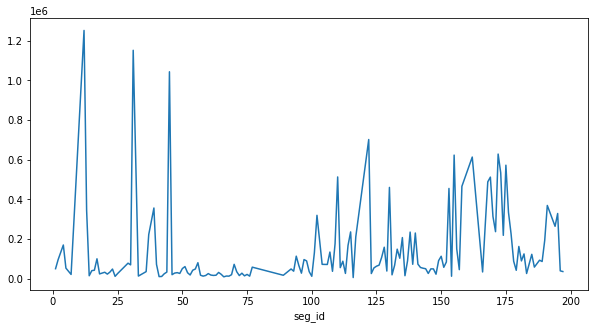

In [17]:
seg_summarize.set_index('seg_id')['sum_nd_pxl'].plot(figsize=(10, 5))

<AxesSubplot:xlabel='seg_id'>

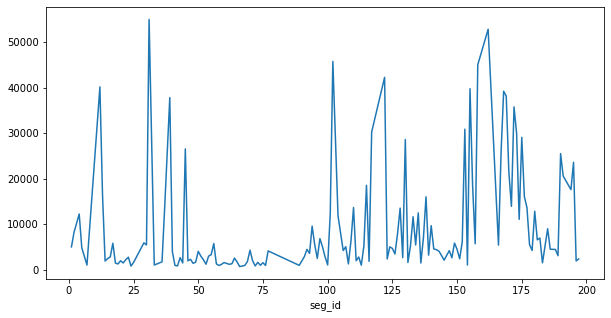

In [18]:
seg_summarize.set_index('seg_id')['cnt_all_pxl'].plot(figsize=(10, 5))

<AxesSubplot:xlabel='seg_id'>

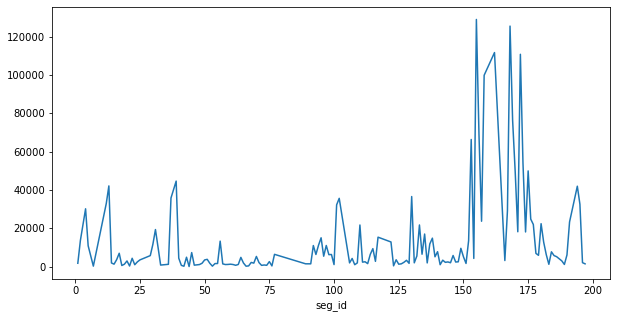

In [19]:
seg_summarize.set_index('seg_id')['sum_pr_pxl'].plot(figsize=(10, 5))

<AxesSubplot:xlabel='nd_pxl_toa1', ylabel='pr_pxl_toa1'>

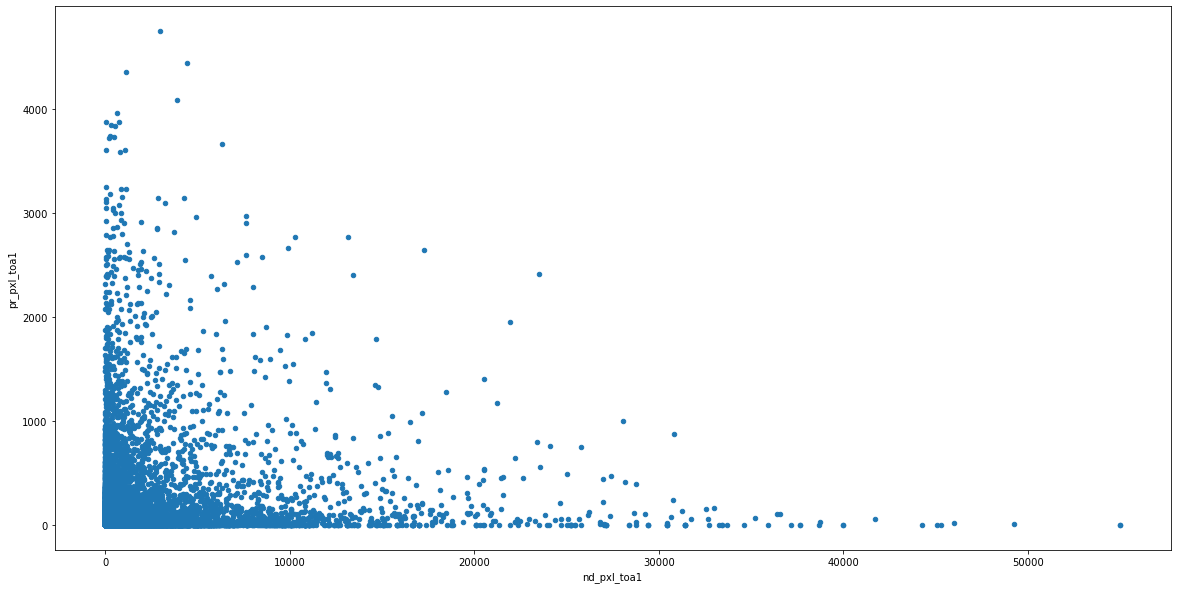

In [20]:
(sarg_gdf
 .plot
 .scatter(x='nd_pxl_toa1', y='pr_pxl_toa1', figsize=(20, 10)))

In [21]:
date_summarize.set_index('image_date')

nd_pxl_toa1                           pr_pxl_toa1              \
                   sum         mean          std         sum        mean   
image_date                                                                 
2015-11-19      334175  2128.503185  5330.264648        2534   16.140127   
2015-11-29      284541  1812.363057  4497.619251       12600   80.254777   
2016-04-27      257978  1643.171975  3550.849619       21184  134.929936   
2016-05-07      123749   788.210191  1532.916087        9686   61.694268   
2016-06-16      589213  3752.949045  7122.526881        1386    8.828025   
...                ...          ...          ...         ...         ...   
2019-11-18       75611   481.598726  2835.227549        9729   61.968153   
2019-11-23      130073   828.490446  2381.831464       14047   89.471338   
2019-12-03       37161   236.694268  1144.166938       12528   79.796178   
2019-12-23       90682   577.592357  1954.788683       18098  115.273885   
2019-12-28       65504   417.222930  2112.275270       15910  101.337580   

                        
                   std  
image_date              
2015-11-19   58.496489  
2015-11-29  223.308568  
2016-04-27  341.311293  
2016-05-07  196.388014  
2016-06-16   26.768518  
...                ...  
2019-11-18  176.065672  
2019-11-23  158.563688  
2019-12-03  163.328823  
2019-12-23  286.079795  
2019-12-28  274.397465  

[107 rows x 6 columns]

In [22]:
date_summarize.dtypes

image_date           datetime64[ns]
nd_pxl_toa1  sum              int64
             mean           float64
             std            float64
pr_pxl_toa1  sum              int64
             mean           float64
             std            float64
dtype: object

In [23]:
sarg_gdf.dtypes

seg_id                         int64
image_date            datetime64[ns]
pr_pxl_toa1                    int64
nd_pxl_toa1                    int64
cnt_pxl_toa1                   int64
nd_prop_toa1                 float64
pr_pxl_toa3                    int64
nd_pxl_toa3                    int64
cnt_pxl_toa3                   int64
nd_prop_toa3                 float64
valid_pxl_toa1                 int64
pr_prop_valid_toa1           float64
pr_toa1                        int64
dtype: object

In [24]:
date_summarize.set_index('image_date').resample('M').count()

nd_pxl_toa1          pr_pxl_toa1         
                   sum mean std         sum mean std
image_date                                          
2015-11-30           2    2   2           2    2   2
2015-12-31           0    0   0           0    0   0
2016-01-31           0    0   0           0    0   0
2016-02-29           0    0   0           0    0   0
2016-03-31           0    0   0           0    0   0
2016-04-30           1    1   1           1    1   1
2016-05-31           1    1   1           1    1   1
2016-06-30           1    1   1           1    1   1
2016-07-31           0    0   0           0    0   0
2016-08-31           0    0   0           0    0   0
2016-09-30           0    0   0           0    0   0
2016-10-31           1    1   1           1    1   1
2016-11-30           0    0   0           0    0   0
2016-12-31           2    2   2           2    2   2
2017-01-31           1    1   1           1    1   1
2017-02-28           2    2   2           2    2   2
2017-03-31           2    2   2           2    2   2
2017-04-30           0    0   0           0    0   0
2017-05-31           2    2   2           2    2   2
2017-06-30           0    0   0           0    0   0
2017-07-31           1    1   1           1    1   1
2017-08-31           1    1   1           1    1   1
2017-09-30           2    2   2           2    2   2
2017-10-31           2    2   2           2    2   2
2017-11-30           1    1   1           1    1   1
2017-12-31           4    4   4           4    4   4
2018-01-31           1    1   1           1    1   1
2018-02-28           6    6   6           6    6   6
2018-03-31           4    4   4           4    4   4
2018-04-30           4    4   4           4    4   4
2018-05-31           3    3   3           3    3   3
2018-06-30           3    3   3           3    3   3
2018-07-31           6    6   6           6    6   6
2018-08-31           4    4   4           4    4   4
2018-09-30           2    2   2           2    2   2
2018-10-31           2    2   2           2    2   2
2018-11-30           3    3   3           3    3   3
2018-12-31           2    2   2           2    2   2
2019-01-31           1    1   1           1    1   1
2019-02-28           4    4   4           4    4   4
2019-03-31           5    5   5           5    5   5
2019-04-30           5    5   5           5    5   5
2019-05-31           4    4   4           4    4   4
2019-06-30           4    4   4           4    4   4
2019-07-31           2    2   2           2    2   2
2019-08-31           3    3   3           3    3   3
2019-09-30           5    5   5           5    5   5
2019-10-31           2    2   2           2    2   2
2019-11-30           3    3   3           3    3   3
2019-12-31           3    3   3           3    3   3

In [25]:
# date_summarize.set_index('image_date').groupby('month')['image_date'].count()
# result = df.groupby([df['ord_date'].dt.year, df['ord_date'].dt.month]).agg({'purch_amt':sum})
date_summarize.groupby(date_summarize['image_date'].dt.month).count()

image_date nd_pxl_toa1          pr_pxl_toa1         
                              sum mean std         sum mean std
image_date                                                     
1                   3           3    3   3           3    3   3
2                  12          12   12  12          12   12  12
3                  11          11   11  11          11   11  11
4                  10          10   10  10          10   10  10
5                  10          10   10  10          10   10  10
6                   8           8    8   8           8    8   8
7                   9           9    9   9           9    9   9
8                   8           8    8   8           8    8   8
9                   9           9    9   9           9    9   9
10                  7           7    7   7           7    7   7
11                  9           9    9   9           9    9   9
12                 11          11   11  11          11   11  11

In [30]:
segs_sarg_gdf = pd.merge(segs_gdf, seg_summarize, how="left", on="seg_id")
segs_sarg_gdf['sarg_ha_km'] = segs_sarg_gdf['sum_pr_pxl'] / 100 / segs_sarg_gdf['length_km']
segs_sarg_gdf

,type_geomorph,length_km,seg_id,shore_desc,desc_abbrev,geometry,sum_nd_pxl,avg_nd_pxl,std_nd_pxl,sum_pr_pxl,avg_pr_pxl,std_pr_pxl,cnt_all_pxl,cnt_sarg_pr,sarg_ha_km
0,cliff or rocky,2.188708,1,Isla Mujeres,imu,"MULTILINESTRING ((530027.596 2344472.852, 5300...",50644,473.308411,974.114474,1716,16.037383,57.413582,5011,17,7.840243
1,sand,3.738697,2,Isla Contoy,ico,"MULTILINESTRING ((521010.617 2378995.910, 5210...",96671,903.467290,1852.025690,13675,127.803738,163.111285,8217,76,36.576912
2,sand,5.622333,4,QR mainland,qrm,"MULTILINESTRING ((433485.994 2090201.431, 4334...",170171,1590.383178,2672.040149,30156,281.831776,280.890480,12240,95,53.636095
3,sand,2.136723,5,QR mainland,qrm,"MULTILINESTRING ((410987.143 2013924.228, 4109...",53527,500.252336,914.620089,10835,101.261682,154.547931,4811,67,50.708485
4,artificial,0.322818,7,QR mainland,qrm,"MULTILINESTRING ((520038.267 2342642.380, 5200...",21713,202.925234,257.914887,220,2.056075,8.092428,1029,10,6.814981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,sand,9.474202,191,Holbox,hol,"MULTILINESTRING ((459230.929 2378361.531, 4592...",369644,3454.616822,5386.582169,23287,217.635514,358.498477,20585,82,24.579378
153,sand,8.177061,194,Holbox,hol,"MULTILINESTRING ((488231.217 2388467.313, 4882...",264461,2471.598131,4622.621242,41951,392.065421,423.092440,17603,92,51.303274
154,sand,11.078166,195,QR mainland,qrm,"MULTILINESTRING ((516830.778 2314283.226, 5168...",329107,3075.766355,3551.437242,32563,304.327103,343.715870,23609,92,29.393853
155,sand,0.784313,196,Isla de la Pasion,ipa,"MULTILINESTRING ((513991.173 2272135.231, 5139...",39864,372.560748,455.670648,2037,19.037383,41.906213,1926,32,25.971790


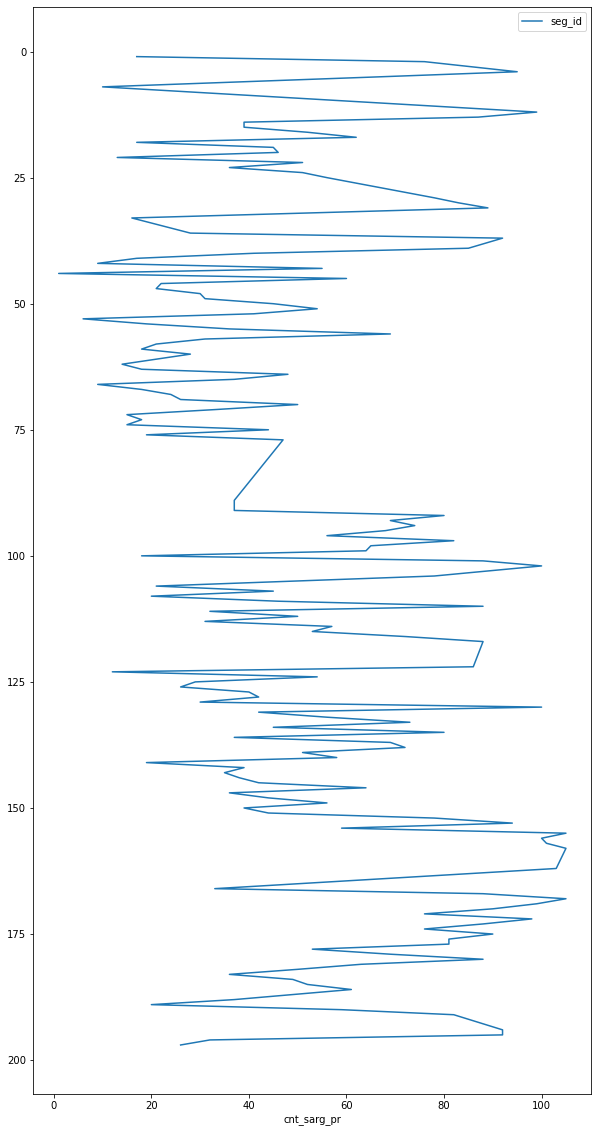

In [39]:
# Sargassum PRevalence 
# segs_sarg_gdf.set_index('seg_id')['cnt_sarg_pr'].plot(x='cnt_sarg_pr', y='seg_id',figsize=(20, 10))
ax = segs_sarg_gdf.plot.line(x='cnt_sarg_pr', y='seg_id',figsize=(10, 20))
ax.invert_yaxis()

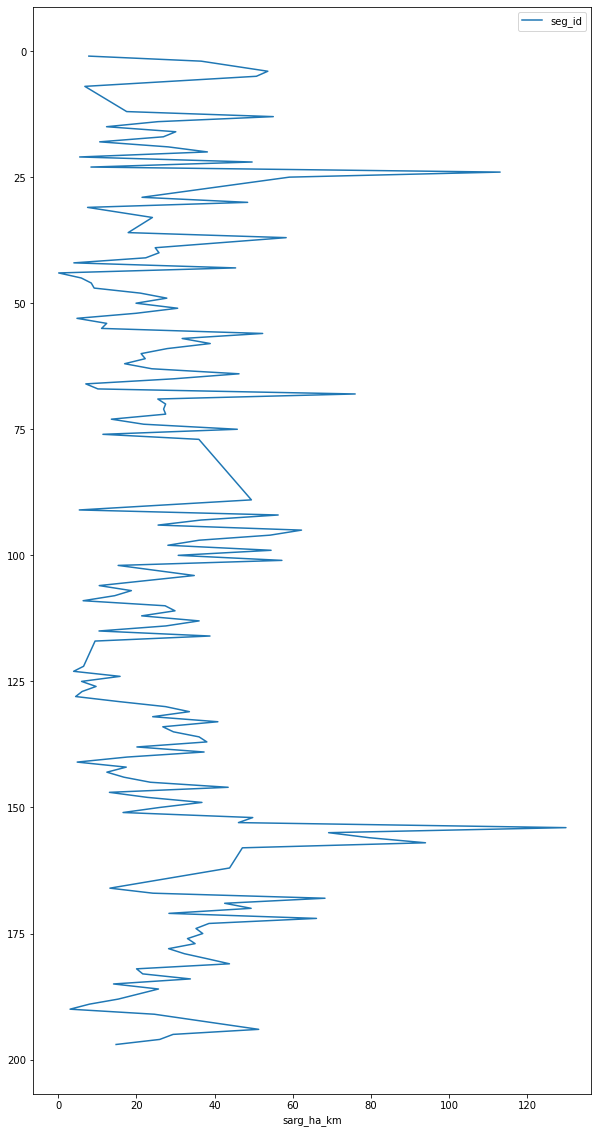

In [40]:
# Sargassum Area 
ax = segs_sarg_gdf.plot.line(x='sarg_ha_km', y='seg_id',figsize=(10, 20))
ax.invert_yaxis()

In [42]:
segs_sarg_gdf.to_file(sarg_gpkg, driver='GPKG', layer='shoreQR_segments_sarg')  
